In [116]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer

# sample 1 and 2 were flawed due to bugs in the api scrapper

data = pd.read_csv('../data/sample3/formatted3.csv')

print(data)
print("\n\nnumber of samples: ", len(data), " games")

     mastery      rank  result
0    21079.8 -0.566667       1
1    50198.2 -0.080000       0
2  -909838.0 -0.080000       0
3    28831.8 -0.416667       1
4   -50030.4 -0.040000       0
..       ...       ...     ...
91   18262.6 -0.640000       0
92  -75507.0 -0.160000       0
93  294128.6  0.000000       0
94 -122087.8 -0.040000       1
95   65571.6 -0.240000       0

[96 rows x 3 columns]


number of samples:  96  games


In [117]:
# reduce scale of mastery points

data['mastery'] = data['mastery'].apply(lambda x: x/1000000)

print(max(data['mastery']))
print(max(data['rank']))

0.3084152
0.8800000000000003


In [137]:
# I want inputs in the form of [[rank_1, rank_2, ..., rank_i], [mastery_1, mastery_2, ..., mastery_i]]
# This way, I can predict a single game by giving my model [[rank],[mastery]]

# formatting rank & mastery into 2D array

inputs = []

for item in data['rank']:
    inputs.append([item, 0])
    
i = 0

for item in data['mastery']:
    inputs[i][1] = item
    i += 1


# splitting data into training and test set (50/50 split)

targets = data['result']
trainx, testx, trainy, testy = train_test_split(inputs, targets, test_size = 0.5)

print()

In [150]:
# applying knn algorithm on training with k = 5 
# (classify a win/loss based on the 5 most similar games in terms of rank difference & mastery difference)

k = 5

model = KNeighborsClassifier(k) 
model.fit(trainx, trainy)

print()

In [153]:
# f1_score

print(model.score(testx, testy))

0.6458333333333334


In [154]:
# using model to predict the outcome of a single game (1 for win 0 for loss)

print(model.predict([[0.3084152, -0.8800000000000003]]))

[1]


In [165]:
# generate an array of how the model would classify each of the 96 games

m = model.predict(inputs)
predicted = []

for a in m:
    predicted.append(int(a))
    
print(predicted)

[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [166]:
# get points for a scatter plot into 1D arrays (x axis will be ranks, y axis will be mastery)

ranks = []
mastery = []

for i,j in inputs:
    ranks.append(i)
    mastery.append(j)  

In [167]:
# make a 2D table where columns are rank diff, mastery diff, predicted outcome

x = []

for i in range(len(ranks)):
    x.append([ranks[i], mastery[i], predicted[i]])

In [168]:
# split into two tables, a win table and a loss table
# plot points (rank vs champ mastery) green if it was a win and red if it was a loss

winx = []
winy = []
lossx = []
lossy = []

for row in x:
    if row[2] == 1:
        winx.append(row[0])
        winy.append(row[1])
    if row[2] == 0:
        lossx.append(row[0])
        lossy.append(row[1])


 the knn classifcation model's predicted classification (win/loss) of the 96 games


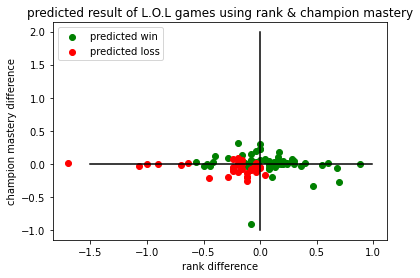

In [169]:
# plot figure with labled axis

fig, ax = plt.subplots()

ax.scatter(winx, winy, c='green', label='predicted win')
ax.scatter(lossx, lossy, c='red', label='predicted loss')
ax.set_title('predicted result of L.O.L games using rank & champion mastery')
ax.set_xlabel("rank difference")
ax.set_ylabel("champion mastery difference")
plt.legend(loc="upper left")

x1 = [0 for i in range(300)]
y1 = [i/100 for i in range(-100, 200)]

ax.plot(x1, y1, c='black')

y2 = [0 for i in range(250)]
x2 = [i/100 for i in range(-150, 100)]

ax.plot(x2, y2, c='black')
print("\n the knn classifcation model's predicted classification (win/loss) of the 96 games")
plt.show()

In [160]:
# make a 2D table where columns are rank diff, mastery diff, actual outcome

for i in range(len(ranks)):
    x.append([ranks[i], mastery[i], targets[i]])

In [161]:
# split into two tables, a win table and a loss table
# plot points (rank vs champ mastery) green if it was a win and red if it was a loss

winx = []
winy = []
lossx = []
lossy = []

for row in x:
    if row[2] == 1:
        winx.append(row[0])
        winy.append(row[1])
    if row[2] == 0:
        lossx.append(row[0])
        lossy.append(row[1])


 the actual outcomes of the 96 sample games


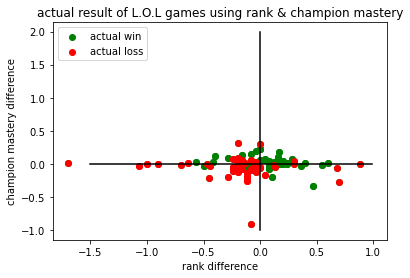

In [163]:
# plot figure with labled axis

fig, ax = plt.subplots()
ax.scatter(winx, winy, c='green', label='actual win')
ax.scatter(lossx, lossy, c='red', label='actual loss')
ax.set_title('actual result of L.O.L games using rank & champion mastery')
ax.set_xlabel("rank difference")
ax.set_ylabel("champion mastery difference")
plt.legend(loc="upper left")

x1 = [0 for i in range(300)]
y1 = [i/100 for i in range(-100, 200)]
ax.plot(x1, y1, c='black')
y2 = [0 for i in range(250)]
x2 = [i/100 for i in range(-150, 100)]
ax.plot(x2, y2, c='black')

print("\n the actual outcomes of the 96 sample games")
plt.show()

In [172]:
# Perform generate cross validation on our model

scores = cross_val_score(model, inputs, targets, cv = 5, scoring = make_scorer(f1_score, pos_label=1))

print("\nFive Itterations of cross validation:")
for i in scores:
    print(i, end=' ')

# Determine model accuracy over a confidence interval 

print("\n\n")
print("Model Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Five Itterations of cross validation:
0.631578947368421 0.6666666666666666 0.7500000000000001 0.6086956521739131 0.6666666666666667 


Model Accuracy: 0.66 (+/- 0.10)


In [173]:
# Other validation metrics

report = classification_report(testy, model.predict(testx))

print(report)

              precision    recall  f1-score   support

           0       0.62      0.48      0.54        21
           1       0.66      0.78      0.71        27

    accuracy                           0.65        48
   macro avg       0.64      0.63      0.63        48
weighted avg       0.64      0.65      0.64        48

